In [373]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [374]:
# titanic = pd.read_csv('titanic_test.csv')

In [375]:
#load dataset

train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

In [376]:
#shuffling the dataset

train = train.sample(frac=1)
test = test.sample(frac=1)

In [377]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
349,350,0,3,"Dimic, Mr. Jovan",male,42.0,0,0,315088,8.6625,NaN,S
730,731,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S
261,262,1,3,"Asplund, Master. Edvin Rojj Felix",male,3.0,4,2,347077,31.3875,NaN,S
83,84,0,1,"Carrau, Mr. Francisco M",male,28.0,0,0,113059,47.1000,NaN,S
455,456,1,3,"Jalsevac, Mr. Ivan",male,29.0,0,0,349240,7.8958,NaN,C


In [378]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
223,1115,3,"Karlsson, Mr. Einar Gervasius",male,21.0,0,0,350053,7.7958,NaN,S
90,982,3,"Dyker, Mrs. Adolf Fredrik (Anna Elisabeth Judi...",female,22.0,1,0,347072,13.9000,NaN,S
140,1032,3,"Goodwin, Miss. Jessie Allis",female,10.0,5,2,CA 2144,46.9000,NaN,S
352,1244,2,"Dibden, Mr. William",male,18.0,0,0,S.O.C. 14879,73.5000,NaN,S
74,966,1,"Geiger, Miss. Amalie",female,35.0,0,0,113503,211.5000,C130,C


In [379]:
titanic['Cabin'].describe()

count                  91
unique                 76
top       B57 B59 B63 B66
freq                    3
Name: Cabin, dtype: object

In [380]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
349,350,0,3,"Dimic, Mr. Jovan",male,42.0,0,0,315088,8.6625,NaN,S
730,731,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S
261,262,1,3,"Asplund, Master. Edvin Rojj Felix",male,3.0,4,2,347077,31.3875,NaN,S
83,84,0,1,"Carrau, Mr. Francisco M",male,28.0,0,0,113059,47.1000,NaN,S
455,456,1,3,"Jalsevac, Mr. Ivan",male,29.0,0,0,349240,7.8958,NaN,C


In [381]:
#check for data info( on the train set)

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 349 to 231
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [382]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 223 to 328
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 39.2+ KB


In [383]:
#checking for missing values in a trianed data
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [384]:
train.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [385]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [386]:
test.isnull().mean()*100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

ValueError: cannot convert float NaN to integer

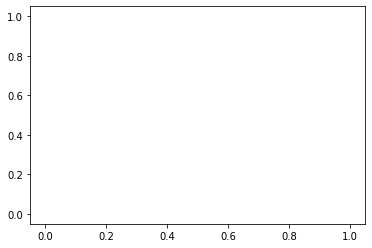

In [387]:
sns.distplot(train['Age'])

In [388]:
#replace missing values

train['Age'].fillna(train['Age'].mean(), inplace= True)
train['Embarked'].fillna(train['Embarked'].mode(), inplace= True)

test['Age'].fillna(test['Age'].mean(), inplace= True)
train['Fare'].fillna(train['Fare'].mean(), inplace= True)

In [389]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 349 to 231
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [390]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 223 to 328
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 39.2+ KB


In [391]:
#drop column with too many missing values
train.drop('Cabin', axis = 1, inplace = True)
test.drop('Cabin', axis = 1, inplace = True)

# Feature Engineering 

In [392]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [393]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
349,350,0,3,"Dimic, Mr. Jovan",male,42.0,0,0,315088,8.6625,S
730,731,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,S
261,262,1,3,"Asplund, Master. Edvin Rojj Felix",male,3.0,4,2,347077,31.3875,S
83,84,0,1,"Carrau, Mr. Francisco M",male,28.0,0,0,113059,47.1000,S
455,456,1,3,"Jalsevac, Mr. Ivan",male,29.0,0,0,349240,7.8958,C


In [394]:
#create a new column(family no)

train['Family No'] = train['SibSp'] + train['Parch']
test['Family No'] = test['SibSp'] + test['Parch']

In [395]:
#drop SibSp and Parch

train.drop(['SibSp', 'Parch'], axis = 1, inplace = True)
test.drop(['SibSp', 'Parch'], axis = 1, inplace = True)

In [396]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family No
349,350,0,3,"Dimic, Mr. Jovan",male,42.0,315088,8.6625,S,0
730,731,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,24160,211.3375,S,0
261,262,1,3,"Asplund, Master. Edvin Rojj Felix",male,3.0,347077,31.3875,S,6
83,84,0,1,"Carrau, Mr. Francisco M",male,28.0,113059,47.1000,S,0
455,456,1,3,"Jalsevac, Mr. Ivan",male,29.0,349240,7.8958,C,0


In [397]:
train['Family No'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Family No, dtype: int64

In [398]:
#creating a column that shows if faminly members are present or not

train['Family'] = train['Family No'].apply(lambda x: 1 if x > 0 else 0)
test['Family'] = test['Family No'].apply(lambda x: 1 if x > 0 else 0)

In [399]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family No,Family
349,350,0,3,"Dimic, Mr. Jovan",male,42.0,315088,8.6625,S,0,0
730,731,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,24160,211.3375,S,0,0
261,262,1,3,"Asplund, Master. Edvin Rojj Felix",male,3.0,347077,31.3875,S,6,1
83,84,0,1,"Carrau, Mr. Francisco M",male,28.0,113059,47.1000,S,0,0
455,456,1,3,"Jalsevac, Mr. Ivan",male,29.0,349240,7.8958,C,0,0


In [400]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family No,Family
223,1115,3,"Karlsson, Mr. Einar Gervasius",male,21.0,350053,7.7958,S,0,0
90,982,3,"Dyker, Mrs. Adolf Fredrik (Anna Elisabeth Judi...",female,22.0,347072,13.9000,S,1,1
140,1032,3,"Goodwin, Miss. Jessie Allis",female,10.0,CA 2144,46.9000,S,7,1
352,1244,2,"Dibden, Mr. William",male,18.0,S.O.C. 14879,73.5000,S,0,0
74,966,1,"Geiger, Miss. Amalie",female,35.0,113503,211.5000,C,0,0


In [401]:
train.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace = True)
test.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace = True)

In [402]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family No,Family
349,0,3,male,42.0,8.6625,S,0,0
730,1,1,female,29.0,211.3375,S,0,0
261,1,3,male,3.0,31.3875,S,6,1
83,0,1,male,28.0,47.1000,S,0,0
455,1,3,male,29.0,7.8958,C,0,0


# Exploratory Data Analysis

In [403]:
#convert every element in Pclass from int to str

# Pclass = str(train['Pclass'])

In [404]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 349 to 231
Data columns (total 8 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Sex          891 non-null object
Age          891 non-null float64
Fare         891 non-null float64
Embarked     889 non-null object
Family No    891 non-null int64
Family       891 non-null int64
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


In [405]:
train['Pclass'] = train['Pclass'].apply(str)

In [406]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 349 to 231
Data columns (total 8 columns):
Survived     891 non-null int64
Pclass       891 non-null object
Sex          891 non-null object
Age          891 non-null float64
Fare         891 non-null float64
Embarked     889 non-null object
Family No    891 non-null int64
Family       891 non-null int64
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


In [407]:
#convert Pclass from integer to string train['Pclass'].astype(str)

train['Pclass'].dtype

dtype('O')

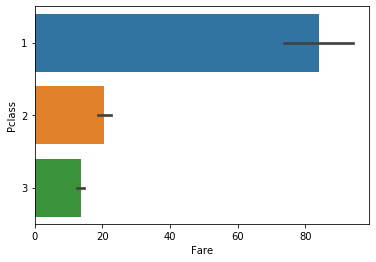

In [408]:
sns.barplot(y = 'Pclass', x ='Fare',  data=train, orient = 'h')

In [409]:
train['Fare'].head()

349      8.6625
730    211.3375
261     31.3875
83      47.1000
455      7.8958
Name: Fare, dtype: float64

In [410]:
train.tail()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family No,Family
397,0,2,male,46.0,26.0000,S,0,0
553,1,3,male,22.0,7.2250,C,0,0
98,1,2,female,34.0,23.0000,S,1,1
474,0,3,female,22.0,9.8375,S,0,0
231,0,3,male,29.0,7.7750,S,0,0


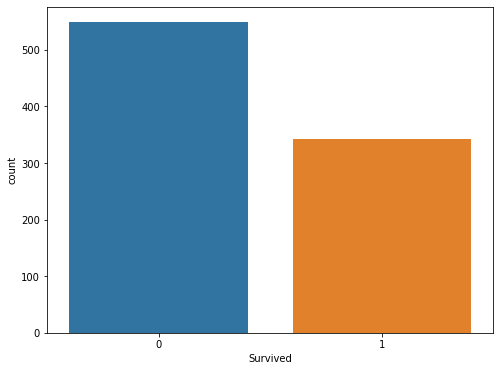

In [411]:
plt.figure(figsize=(8,6))
sns.countplot(train['Survived'])

In [412]:
test.head()

,Pclass,Sex,Age,Fare,Embarked,Family No,Family
223,3,male,21.0,7.7958,S,0,0
90,3,female,22.0,13.9000,S,1,1
140,3,female,10.0,46.9000,S,7,1
352,2,male,18.0,73.5000,S,0,0
74,1,female,35.0,211.5000,C,0,0


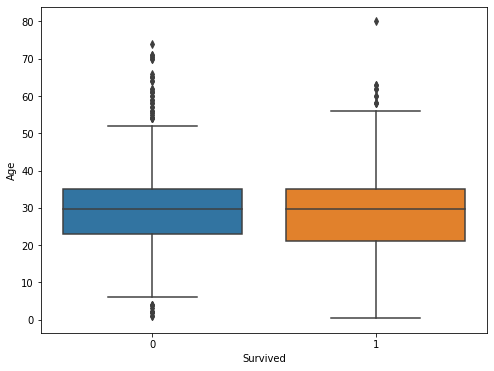

In [413]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Survived',y='Age', data = train )

In [414]:
#its advisable you convert all your data to numerical form
#hence why we are one hot encoding Embarked, pclass and sex

In [415]:
col = ['Embarked','Pclass','Sex']

train_enc = pd.get_dummies(train, columns=col, drop_first= True)
test_enc = pd.get_dummies(test, columns=col, drop_first= True)

In [416]:
train_enc.head()

,Survived,Age,Fare,Family No,Family,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Sex_male
349,0,42.0,8.6625,0,0,0,1,0,1,1
730,1,29.0,211.3375,0,0,0,1,0,0,0
261,1,3.0,31.3875,6,1,0,1,0,1,1
83,0,28.0,47.1000,0,0,0,1,0,0,1
455,1,29.0,7.8958,0,0,0,0,0,1,1


# Model Creation - Classification Model

1.Precision
2.Recall
3.F1

In [417]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Baseline for people that did not survive == 0

Precision = 549/(549+342) = 0.62

Recall = 549/549 = 1

F1 Score = 2/((1/0.62) + (1/1) = 0.77


Baseline for people that survived == 0

Precision = 0.0/0.0 = 0.0

Recall = 0/342 = 

F1 Score = 0

Average of the two classes

Precision = 0.31

Recall = 0.5

F1 Score = 0.385



In [418]:
#Model

X = train_enc.drop('Survived', axis=1)
y = train_enc['Survived']

In [419]:
X_train,  X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state = 7)

In [420]:
lr = LogisticRegression()

In [421]:
lr.fit(X_train, y_train)

C:\Users\iDAFAdmin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [422]:
train_enc.head()

,Survived,Age,Fare,Family No,Family,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Sex_male
349,0,42.0,8.6625,0,0,0,1,0,1,1
730,1,29.0,211.3375,0,0,0,1,0,0,0
261,1,3.0,31.3875,6,1,0,1,0,1,1
83,0,28.0,47.1000,0,0,0,1,0,0,1
455,1,29.0,7.8958,0,0,0,0,0,1,1


In [423]:
prediction = lr.predict(X_val)

In [424]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [425]:
print(classification_report(y_val, prediction))
print('\n')
print(confusion_matrix(y_val, prediction))
print('\n')
print(f" Accuracy Score {accuracy_score(y_val, prediction)}")

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       116
           1       0.76      0.65      0.70        63

    accuracy                           0.80       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.80      0.80      0.80       179



[[103  13]
 [ 22  41]]


 Accuracy Score 0.8044692737430168


In [439]:
test_enc.head()

,Age,Fare,Family No,Family,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Sex_male
223,21.0,7.7958,0,0,0,1,0,1,1
90,22.0,13.9000,1,1,0,1,0,1,0
140,10.0,46.9000,7,1,0,1,0,1,0
352,18.0,73.5000,0,0,0,1,1,0,1
74,35.0,211.5000,0,0,0,0,0,0,0


In [440]:
test_enc.isnull().sum()

Age           0
Fare          1
Family No     0
Family        0
Embarked_Q    0
Embarked_S    0
Pclass_2      0
Pclass_3      0
Sex_male      0
dtype: int64

In [455]:
test_enc['Fare'].fillna(test_enc['Fare'].mean(), inplace=True)

In [456]:
# test_enc.Fare.mean()

In [457]:
# pred = lr.predict(test_enc)

In [459]:
# train['Age']